In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('kluster0.csv')
df2 = pd.read_csv('kluster1.csv')
df3 = pd.read_csv('kluster2.csv')

In [3]:
dff = pd.concat([df1, df2, df3])

In [4]:
dff.shape

(200, 6)

In [5]:
dff.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,94,Female,40,60,40,0
1,113,Female,38,64,42,0
2,121,Male,27,67,56,0
3,122,Female,38,67,40,0
4,123,Female,40,69,58,0


In [6]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 61
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 10.9+ KB


In [7]:
dff.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.930000
std,57.879185,13.969007,26.264721,25.823522,0.829785
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000
max,200.000000,70.000000,137.000000,99.000000,2.000000


## `Sistem Fuzzy Mamdani`

In [8]:
mean1 = df1['Annual Income (k$)'].mean()
std1 = df1['Annual Income (k$)'].std()

mean2 = df2['Annual Income (k$)'].mean()
std2 = df2['Annual Income (k$)'].std()

mean3 = df3['Annual Income (k$)'].mean()
std3 = df3['Annual Income (k$)'].std()

print('anual income')
print('cluster 1: ', mean1, std1)
print('cluster 2: ', mean2, std2)
print('cluster 3: ', mean3, std3)

anual income
cluster 1:  85.9342105263158 16.91337579260138
cluster 2:  38.79032258064516 16.53127894328788
cluster 3:  51.225806451612904 15.906921222587261


In [9]:
mean11 = df1['Age'].mean()
std11 = df1['Age'].std()

mean22 = df2['Age'].mean()
std22 = df2['Age'].std()

mean33 = df3['Age'].mean()
std33 = df3['Age'].std()

print('age')
print('cluster 1: ', mean11, std11)
print('cluster 2: ', mean22, std22)
print('cluster 3: ', mean33, std33)

age
cluster 1:  34.96052631578947 7.314717200227104
cluster 2:  26.661290322580644 6.731242421520848
cluster 3:  55.806451612903224 7.962697272801224


In [10]:
mean111 = df1['Spending Score (1-100)'].mean()
std111 = df1['Spending Score (1-100)'].std()

mean222 = df2['Spending Score (1-100)'].mean()
std222 = df2['Spending Score (1-100)'].std()

mean333 = df3['Spending Score (1-100)'].mean()
std333 = df3['Spending Score (1-100)'].std()

print('Spending Score (1-100)')
print('cluster 1: ', mean111, std111)
print('cluster 2: ', mean222, std222)
print('cluster 3: ', mean333, std333)

Spending Score (1-100)
cluster 1:  53.39473684210526 32.02169220902957
cluster 2:  56.806451612903224 21.233162053945136
cluster 3:  39.67741935483871 17.15481502310638


/Users/fayyazi/programing/.venv/lib/python3.13/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


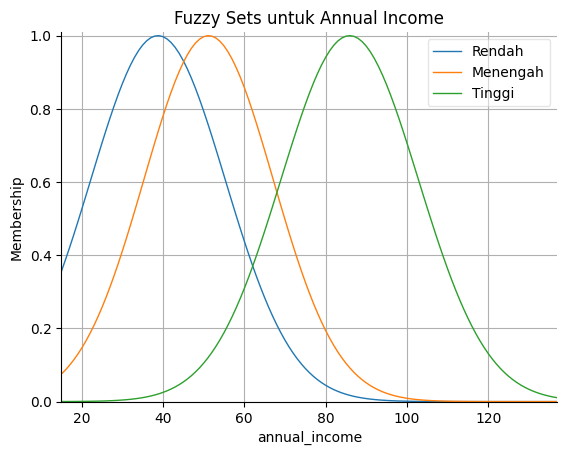

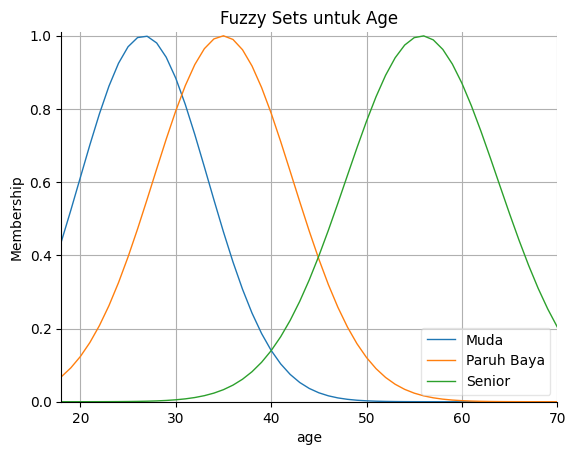

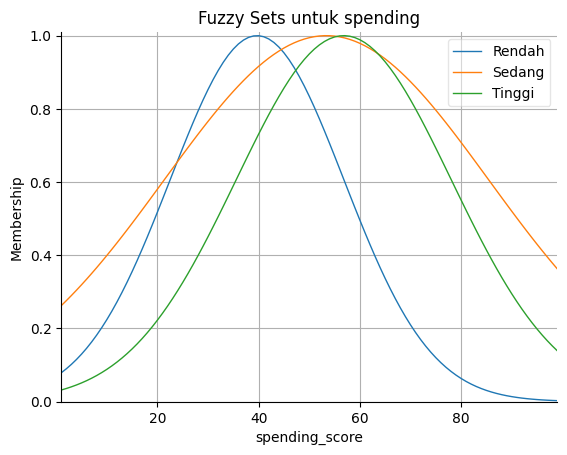

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Gunakan variabel untuk menyimpan parameter
# Urutan diatur berdasarkan nilai mean untuk penamaan yang logis
income_params = {
    'Rendah':   {'mean': mean2, 'std': std2},
    'Menengah': {'mean': mean3, 'std': std3},
    'Tinggi':   {'mean': mean1, 'std': std1}
}

age_params = {
    'Muda':       {'mean': mean22, 'std': std22},
    'Paruh Baya': {'mean': mean11, 'std': std11},
    'Senior':     {'mean': mean33, 'std': std33}
}

spending_params = {
    'Rendah': {'mean': mean333, 'std': std333},
    'Sedang': {'mean': mean111, 'std': std111},
    'Tinggi': {'mean': mean222, 'std': std222}
}

# 2. Definisikan Universe of Discourse (rentang nilai yang mungkin)
x_income = np.arange(15, 138, 1)
x_age = np.arange(18, 71, 1)
x_spending = np.arange(1, 100, 1)

# 3. Buat variabel fuzzy untuk Antecedent (input)
annual_income = ctrl.Antecedent(x_income, 'annual_income')
age = ctrl.Antecedent(x_age, 'age')
spending_score = ctrl.Consequent(x_spending, 'spending_score')

# 4. Buat fungsi keanggotaan secara dinamis dari parameter
for label, params in income_params.items():
    annual_income[label] = fuzz.gaussmf(annual_income.universe, mean=params['mean'], sigma=params['std'])

for label, params in age_params.items():
    age[label] = fuzz.gaussmf(age.universe, mean=params['mean'], sigma=params['std'])

for label, params in spending_params.items():
    spending_score[label] = fuzz.gaussmf(spending_score.universe, mean=params['mean'], sigma=params['std'])

# 5. Visualisasikan hasilnya untuk memeriksa
# Visualisasi untuk Annual Income
annual_income.view()
plt.title('Fuzzy Sets untuk Annual Income')
plt.grid(True)
plt.show()

# Visualisasi untuk Age
age.view()
plt.title('Fuzzy Sets untuk Age')
plt.grid(True)
plt.show()

spending_score.view()
plt.title('Fuzzy Sets untuk spending')
plt.grid(True)
plt.show()


Input 1: Age=20, Income=15
SoM : 27.00
LoM : 87.00
MoM : 57.00


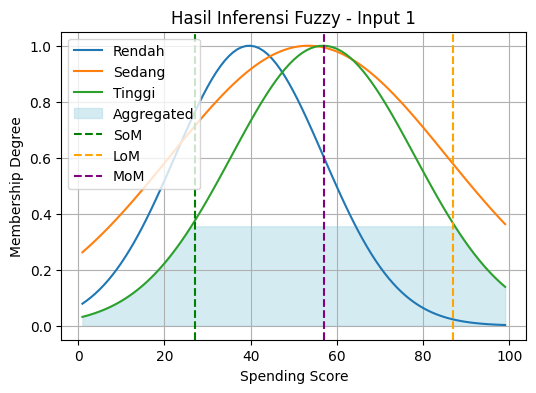


Input 2: Age=50, Income=40
SoM : 28.00
LoM : 52.00
MoM : 40.00


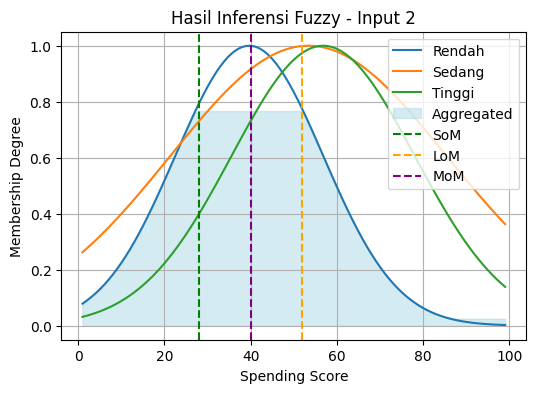


Input 3: Age=35, Income=70
SoM : 24.00
LoM : 83.00
MoM : 53.50


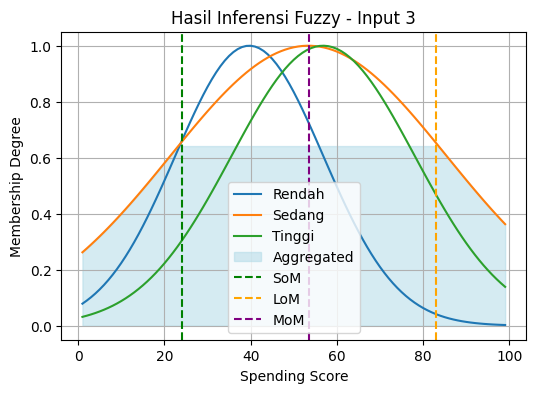

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# --- 1. Parameter fuzzy (mean & std) ---
income_params = {
    'Rendah':   {'mean': mean2, 'std': std2},
    'Menengah': {'mean': mean3, 'std': std3},
    'Tinggi':   {'mean': mean1, 'std': std1}
}

age_params = {
    'Muda':       {'mean': mean22, 'std': std22},
    'Paruh Baya': {'mean': mean11, 'std': std11},
    'Senior':     {'mean': mean33, 'std': std33}
}

spending_params = {
    'Rendah': {'mean': mean333, 'std': std333},
    'Sedang': {'mean': mean111, 'std': std111},
    'Tinggi': {'mean': mean222, 'std': std222}
}

# 2. Definisikan Universe of Discourse (rentang nilai yang mungkin)
x_income = np.arange(15, 138, 1)
x_age = np.arange(18, 71, 1)
x_spending = np.arange(1, 100, 1)

# 3. Buat variabel fuzzy untuk Antecedent (input)
annual_income = ctrl.Antecedent(x_income, 'annual_income')
age = ctrl.Antecedent(x_age, 'age')
spending_score = ctrl.Consequent(x_spending, 'spending_score')

# 4. Buat fungsi keanggotaan secara dinamis dari parameter
for label, params in income_params.items():
    annual_income[label] = fuzz.gaussmf(annual_income.universe, mean=params['mean'], sigma=params['std'])

for label, params in age_params.items():
    age[label] = fuzz.gaussmf(age.universe, mean=params['mean'], sigma=params['std'])

for label, params in spending_params.items():
    spending_score[label] = fuzz.gaussmf(spending_score.universe, mean=params['mean'], sigma=params['std'])

# --- 6. Rule base ---
rule1 = ctrl.Rule(annual_income['Tinggi'] & age['Paruh Baya'], spending_score['Sedang'])
rule2 = ctrl.Rule(annual_income['Rendah'] & age['Muda'], spending_score['Tinggi'])
rule3 = ctrl.Rule(annual_income['Menengah'] & age['Senior'], spending_score['Rendah'])

spending_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
spending_sim = ctrl.ControlSystemSimulation(spending_ctrl)

# --- 7. Daftar input ---
inputs = [
    {'age': 20, 'annual_income': 15},
    {'age': 50, 'annual_income': 40},
    {'age': 35, 'annual_income': 70}
]

# --- 8. Hitung dan visualisasi ---
for i, inp in enumerate(inputs, 1):
    alpha1 = np.fmin(
        fuzz.interp_membership(x_income, annual_income['Tinggi'].mf, inp['annual_income']),
        fuzz.interp_membership(x_age, age['Paruh Baya'].mf, inp['age'])
    )
    alpha2 = np.fmin(
        fuzz.interp_membership(x_income, annual_income['Rendah'].mf, inp['annual_income']),
        fuzz.interp_membership(x_age, age['Muda'].mf, inp['age'])
    )
    alpha3 = np.fmin(
        fuzz.interp_membership(x_income, annual_income['Menengah'].mf, inp['annual_income']),
        fuzz.interp_membership(x_age, age['Senior'].mf, inp['age'])
    )

    rule1_clip = np.fmin(alpha1, spending_score['Sedang'].mf)
    rule2_clip = np.fmin(alpha2, spending_score['Tinggi'].mf)
    rule3_clip = np.fmin(alpha3, spending_score['Rendah'].mf)

    aggregated = np.fmax(np.fmax(rule1_clip, rule2_clip), rule3_clip)

    # Max-membership principle
    max_val = np.max(aggregated)
    indices = np.where(aggregated == max_val)[0]
    possible_values = x_spending[indices]

    som_result = np.min(possible_values)
    lom_result = np.max(possible_values)
    mom_result = np.mean(possible_values)

    # --- Tampilkan hasil ---
    print(f"\nInput {i}: Age={inp['age']}, Income={inp['annual_income']}")
    print(f"SoM : {som_result:.2f}")
    print(f"LoM : {lom_result:.2f}")
    print(f"MoM : {mom_result:.2f}")

    # --- Visualisasi ---
    plt.figure(figsize=(6,4))
    plt.plot(x_spending, spending_score['Rendah'].mf, label='Rendah')
    plt.plot(x_spending, spending_score['Sedang'].mf, label='Sedang')
    plt.plot(x_spending, spending_score['Tinggi'].mf, label='Tinggi')
    plt.fill_between(x_spending, aggregated, color='lightblue', alpha=0.5, label='Aggregated')
    plt.axvline(som_result, color='green', linestyle='--', label='SoM')
    plt.axvline(lom_result, color='orange', linestyle='--', label='LoM')
    plt.axvline(mom_result, color='purple', linestyle='--', label='MoM')
    plt.title(f'Hasil Inferensi Fuzzy - Input {i}')
    plt.xlabel('Spending Score')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()


## `Sistem Fuzzy Tsukomoto`


Input 1: Age=20, Income=15
Alpha1=0.000, Alpha2=0.355, Alpha3=0.000
z1=40.01, z2=61.30, z3=60.00
Prediksi Spending Score (Tsukamoto) = 61.29


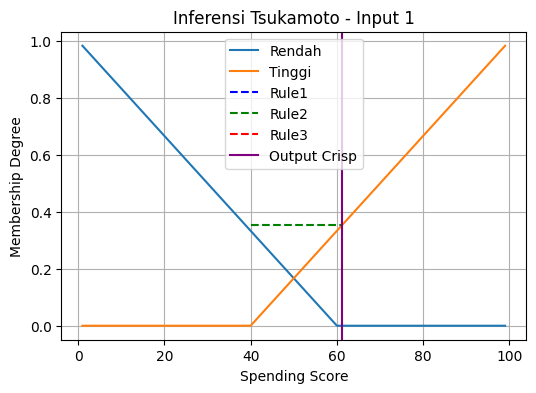


Input 2: Age=50, Income=40
Alpha1=0.025, Alpha2=0.002, Alpha3=0.767
z1=41.50, z2=40.15, z3=14.01
Prediksi Spending Score (Tsukamoto) = 14.95


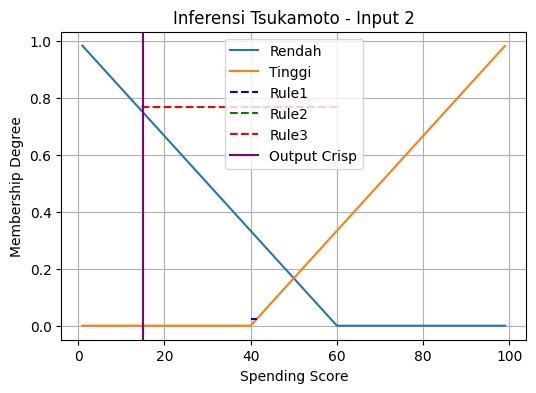


Input 3: Age=35, Income=70
Alpha1=0.642, Alpha2=0.168, Alpha3=0.033
z1=78.50, z2=50.10, z3=58.03
Prediksi Spending Score (Tsukamoto) = 72.03


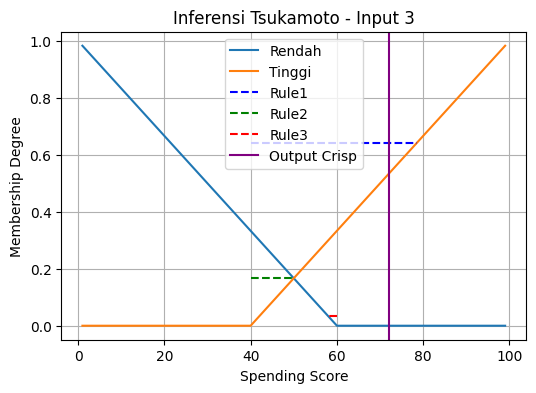

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# --- 1. Definisikan Fuzzy Sets dan Membership Functions ---
income_params = {
    'Rendah':   {'mean': mean2, 'std': std2},
    'Menengah': {'mean': mean3, 'std': std3},
    'Tinggi':   {'mean': mean1, 'std': std1}
}

age_params = {
    'Muda':       {'mean': mean22, 'std': std22},
    'Paruh Baya': {'mean': mean11, 'std': std11},
    'Senior':     {'mean': mean33, 'std': std33}
}

x_income = np.arange(15, 138, 1)
x_age = np.arange(18, 71, 1)
x_spending = np.arange(1, 100, 1)

annual_income = ctrl.Antecedent(x_income, 'annual_income')
age = ctrl.Antecedent(x_age, 'age')
spending_score_tsukamoto = ctrl.Consequent(x_spending, 'spending_score_tsukamoto')

for label, params in income_params.items():
    annual_income[label] = fuzz.gaussmf(annual_income.universe, mean=params['mean'], sigma=params['std'])

for label, params in age_params.items():
    age[label] = fuzz.gaussmf(age.universe, mean=params['mean'], sigma=params['std'])

# Output monotonik
spending_score_tsukamoto['Rendah'] = fuzz.trimf(spending_score_tsukamoto.universe, [0, 0, 60])
spending_score_tsukamoto['Tinggi'] = fuzz.trimf(spending_score_tsukamoto.universe, [40, 100, 100])

# --- 2. Aturan Tsukamoto ---
# 1: Income Tinggi & Age Paruh Baya -> Tinggi
# 2: Income Rendah & Age Muda -> Tinggi
# 3: Income Menengah & Age Senior -> Rendah

inputs = [
    {'age': 20, 'annual_income': 15},
    {'age': 50, 'annual_income': 40},
    {'age': 35, 'annual_income': 70}
]

for i, inp in enumerate(inputs, 1):
    # Hitung membership input
    income_level_rendah = fuzz.interp_membership(x_income, annual_income['Rendah'].mf, inp['annual_income'])
    income_level_menengah = fuzz.interp_membership(x_income, annual_income['Menengah'].mf, inp['annual_income'])
    income_level_tinggi = fuzz.interp_membership(x_income, annual_income['Tinggi'].mf, inp['annual_income'])
    
    age_level_muda = fuzz.interp_membership(x_age, age['Muda'].mf, inp['age'])
    age_level_paruhbaya = fuzz.interp_membership(x_age, age['Paruh Baya'].mf, inp['age'])
    age_level_senior = fuzz.interp_membership(x_age, age['Senior'].mf, inp['age'])
    
    # Hitung alpha tiap aturan (MIN untuk AND)
    alpha1 = np.fmin(income_level_tinggi, age_level_paruhbaya)
    alpha2 = np.fmin(income_level_rendah, age_level_muda)
    alpha3 = np.fmin(income_level_menengah, age_level_senior)
    
    # Hitung nilai z per aturan (inversi fungsi output monotonik)
    z1 = alpha1 * (100 - 40) + 40  # Tinggi [40,100,100]
    z2 = alpha2 * (100 - 40) + 40  # Tinggi [40,100,100]
    z3 = 60 - alpha3 * 60          # Rendah [0,0,60]
    
    # Weighted average
    numerator = (alpha1 * z1) + (alpha2 * z2) + (alpha3 * z3)
    denominator = alpha1 + alpha2 + alpha3
    final_output = numerator / denominator if denominator != 0 else 0
    
    print(f"\nInput {i}: Age={inp['age']}, Income={inp['annual_income']}")
    print(f"Alpha1={alpha1:.3f}, Alpha2={alpha2:.3f}, Alpha3={alpha3:.3f}")
    print(f"z1={z1:.2f}, z2={z2:.2f}, z3={z3:.2f}")
    print(f"Prediksi Spending Score (Tsukamoto) = {final_output:.2f}")
    
    # --- Visualisasi ---
    plt.figure(figsize=(6,4))
    plt.plot(spending_score_tsukamoto.universe, spending_score_tsukamoto['Rendah'].mf, label='Rendah')
    plt.plot(spending_score_tsukamoto.universe, spending_score_tsukamoto['Tinggi'].mf, label='Tinggi')
    
    # Garis horizontal alpha per aturan
    plt.hlines(alpha1, 40, z1, colors='blue', linestyle='--', label='Rule1')
    plt.hlines(alpha2, 40, z2, colors='green', linestyle='--', label='Rule2')
    plt.hlines(alpha3, 60, z3, colors='red', linestyle='--', label='Rule3')
    
    # Garis vertikal final output
    plt.axvline(final_output, color='purple', linestyle='-', label='Output Crisp')
    
    plt.title(f'Inferensi Tsukamoto - Input {i}')
    plt.xlabel('Spending Score')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()
